In [1]:
from sklearn.datasets import load_diabetes

diabetes_data = load_diabetes()

In [2]:
diabetes_data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [3]:
print(f"Ключи diabetes_data: \n{diabetes_data.keys()}")

Ключи diabetes_data: 
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [4]:
diabetes_data.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [5]:
print(f"Форма миссива data: \n{diabetes_data['data'].shape}")

Форма миссива data: 
(442, 10)


In [6]:
print(f"Форма массива target: \n{diabetes_data['target'].shape}")

Форма массива target: 
(442,)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes_data['data'], diabetes_data['target'], random_state=42)

In [8]:
print(f"Форма массива x_train: {X_train.shape}")
print(f"Форма массива y_train: {y_train.shape}")

Форма массива x_train: (331, 10)
Форма массива y_train: (331,)


In [9]:
print(f"Форма массива x_test: {X_test.shape}")
print(f"Форма массива y_test: {y_test.shape}")

Форма массива x_test: (111, 10)
Форма массива y_test: (111,)


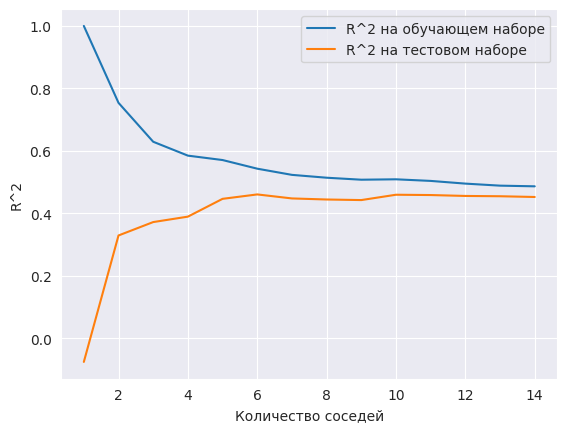

In [10]:
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor


training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 15)

for n_neighbors in neighbors_settings:
   
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    training_accuracy.append(reg.score(X_train, y_train))
    test_accuracy.append(reg.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="R^2 на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="R^2 на тестовом наборе")
plt.ylabel("R^2")
plt.xlabel("Количество соседей")
plt.legend()
plt.show()


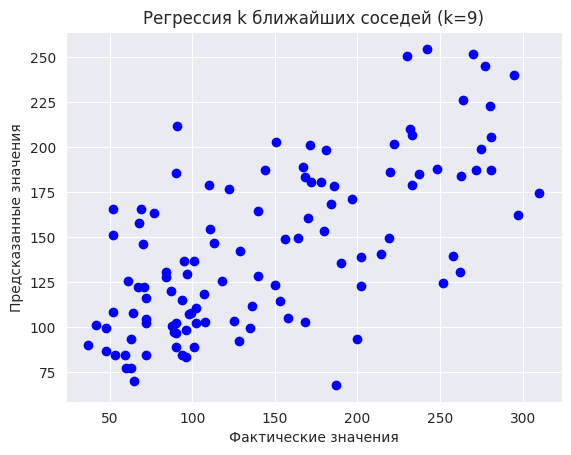

Среднеквадратичное отклонение (MSE): 3082.080524969414


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9]}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_n_neighbors = grid_search.best_params_['n_neighbors']

regressor = KNeighborsRegressor(n_neighbors=best_n_neighbors)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = np.mean((y_pred - y_test) ** 2)

plt.scatter(y_test, y_pred, color='b')
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title(f"Регрессия k ближайших соседей (k={best_n_neighbors})")
plt.show()

print(f"Среднеквадратичное отклонение (MSE): {mse}")


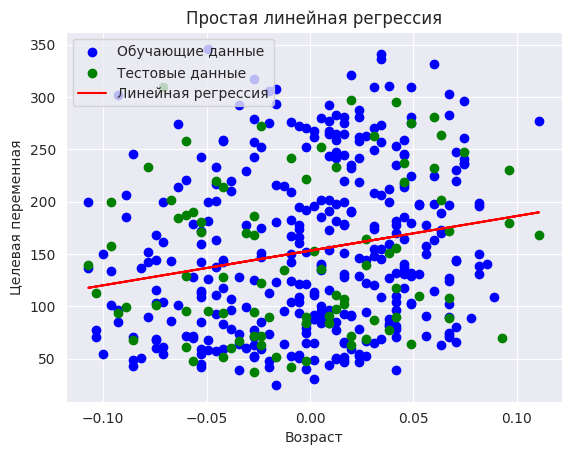

Среднеквадратичное отклонение (MSE) на тестовом наборе: 5254.231976236004


In [12]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X_age = diabetes_data.data[:, 0].reshape(-1, 1)
y = diabetes_data.target

X_train, X_test, y_train, y_test = train_test_split(X_age, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

plt.scatter(X_train, y_train, color='b', label='Обучающие данные')
plt.scatter(X_test, y_test, color='g', label='Тестовые данные')
plt.plot(X_age, model.predict(X_age), color='r', label='Линейная регрессия')
plt.xlabel("Возраст")
plt.ylabel("Целевая переменная")
plt.title("Простая линейная регрессия")
plt.legend()
plt.show()

mse = np.mean((predictions_test - y_test) ** 2)
print(f"Среднеквадратичное отклонение (MSE) на тестовом наборе: {mse}")


In [13]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
X_train, X_test, y_train, y_test = train_test_split(diabetes_data.data, diabetes_data.target, test_size=0.2, random_state=42)
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']

ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

train_score = ridge.score(X_train, y_train)
test_score = ridge.score(X_test, y_test)

print(f"Правильность на обучающем наборе: {train_score:.2f}")
print(f"Правильность на тестовом наборе: {test_score:.2f}")


Правильность на обучающем наборе: 0.52
Правильность на тестовом наборе: 0.46


In [14]:
from sklearn.linear_model import Lasso
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Создайте экземпляр модели Lasso
lasso = Lasso()
X_train, X_test, y_train, y_test = train_test_split(diabetes_data.data, diabetes_data.target, test_size=0.2, random_state=42)
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']

lasso = Lasso(alpha=best_alpha)

lasso.fit(X_train, y_train)

print("Оценка на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train)))
print("Оценка на тестовом наборе: {:.2f}".format(lasso.score(X_test, y_test)))


Оценка на обучающем наборе: 0.52
Оценка на тестовом наборе: 0.47


In [15]:

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
X, y = diabetes_data.data, (diabetes_data.target > 140).astype(int) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

train_accuracy = logistic_regression.score(X_train, y_train)
test_accuracy = logistic_regression.score(X_test, y_test)

print("Точность на обучающем наборе: {:.2f}".format(train_accuracy))
print("Точность на тестовом наборе: {:.2f}".format(test_accuracy))


Точность на обучающем наборе: 0.76
Точность на тестовом наборе: 0.72


<h2>На основе результатов разных моделей для датасета diabetes_data можно сделать следующие выводы:

<h2>KNeighborsRegressor: 
<h3>Модель K ближайших соседей дала среднеквадратичное отклонение (MSE) в размере 3082.94, что представляет собой ошибку на тестовом наборе данных. Эта ошибка показывает, насколько хорошо модель предсказывает значения. В данном случае, чем ближе значение MSE к нулю, тем лучше. Ошибка в размере 3082.94 может считаться относительно высокой, и возможно, стоит рассмотреть другие модели или параметры для улучшения производительности.

<h2>LinearRegression: 
<h3>Модель линейной регрессии имеет более высокое среднеквадратичное отклонение (MSE) на тестовом наборе данных, равное 5254.23. Это может свидетельствовать о том, что модель не очень хорошо подходит для этого датасета, и возможно, требуется более сложная модель или предварительная обработка данных.

<h2>Ridge: 
<h3>Модель Ridge регрессии показала правильность (коэффициент детерминации) на обучающем наборе равную 0.52 и на тестовом наборе - 0.46. Эти значения указывают на среднюю производительность модели. Возможно, более тщательная настройка параметров или выбор другой модели может улучшить результаты.

<h2>Lasso: 
<h3>Модель Lasso регрессии дала оценку (коэффициент детерминации) на обучающем наборе 0.52 и на тестовом наборе 0.47. Это может указывать на переобучение модели на обучающем наборе данных, что приводит к плохой обобщающей способности на тестовых данных. Возможно, стоит рассмотреть более слабую регуляризацию или другие модели.

<h2>LogisticRegression: 
<h3>Для задачи бинарной классификации с использованием модели Logistic Regression точность модели на обучающем наборе составляет 0.76, а на тестовом наборе - 0.71. Это может свидетельствовать о том, что модель хорошо предсказывает классы на тестовых данных. Однако стоит также обратить внимание на баланс между точностью и обобщающей способностью модели, чтобы избежать переобучения.